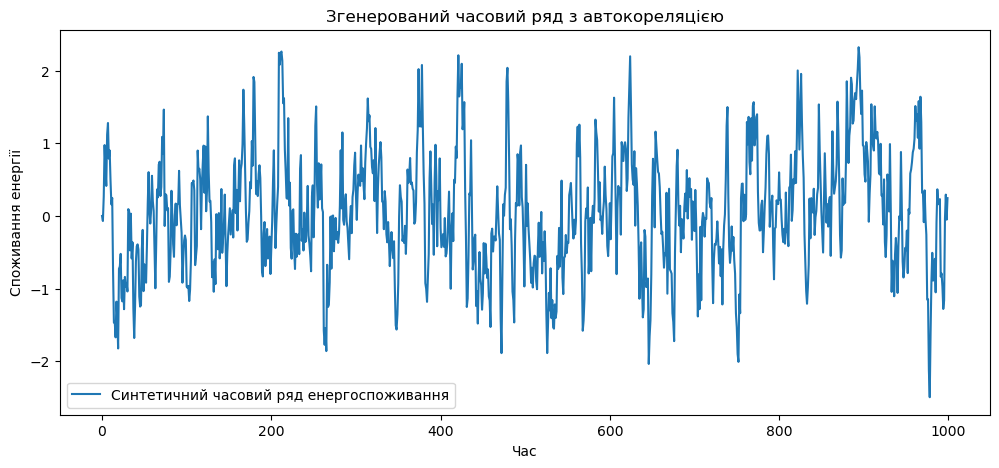

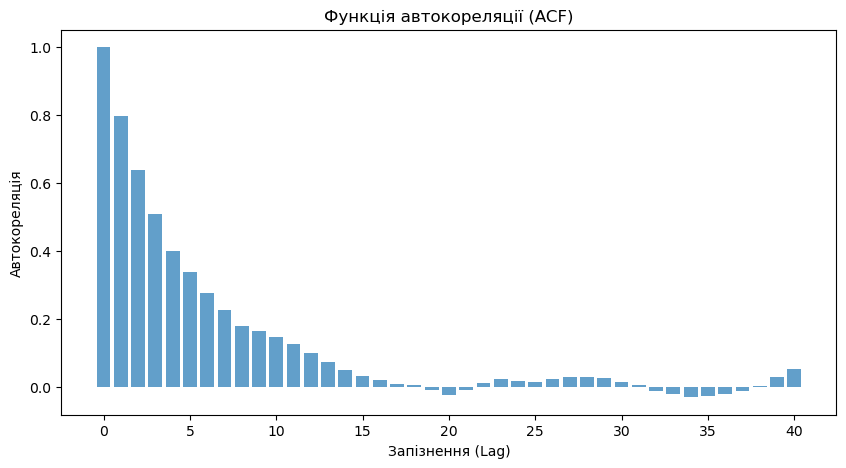

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf

def generate_energy_consumption_series(n=1000, phi=0.8, noise_std=0.5, seed=42):
    """
    Генерує псевдовипадковий часовий ряд енергоспоживання із заданою автокореляцією.
    
    :param n: Кількість точок у ряді
    :param phi: Коефіцієнт автокореляції (0 < phi < 1)
    :param noise_std: Стандартне відхилення шуму
    :param seed: Початкове значення для генератора випадкових чисел
    :return: Згенерований часовий ряд
    """
    np.random.seed(seed)
    series = np.zeros(n)
    noise = np.random.normal(0, noise_std, n)
    
    # AR(1) процес
    for t in range(1, n):
        series[t] = phi * series[t-1] + noise[t]
    
    return series

# Генерація часових рядів
n_points = 1000
timeseries = generate_energy_consumption_series(n=n_points)

# Побудова графіку
plt.figure(figsize=(12, 5))
plt.plot(timeseries, label='Синтетичний часовий ряд енергоспоживання')
plt.xlabel('Час')
plt.ylabel('Споживання енергії')
plt.legend()
plt.title('Згенерований часовий ряд з автокореляцією')
plt.show()

# Автокореляційна функція
lags = 40
acf_values = acf(timeseries, nlags=lags)
plt.figure(figsize=(10, 5))
plt.bar(range(lags+1), acf_values, alpha=0.7)
plt.xlabel('Запізнення (Lag)')
plt.ylabel('Автокореляція')
plt.title('Функція автокореляції (ACF)')
plt.show()
